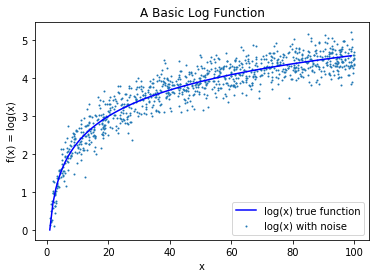

In [10]:
import numpy as np
import pylab as pl

x = np.random.uniform(1, 100, 1000)
y = np.log(x) + np.random.normal(0, .3, 1000)

pl.scatter(x, y, s=1, label="log(x) with noise")

pl.plot(np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function")
pl.xlabel("x")
pl.ylabel("f(x) = log(x)")
pl.legend(loc="best")
pl.title("A Basic Log Function")
pl.show()

In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]

pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,11,0,0
versicolor,0,9,2
virginica,0,1,9
